# Ventilator-Pressure-Prediction



## Installing Required Libraries

In [1]:
!pip install jovian

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.6/68.6 KB 674.4 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for uuid: filename=uuid-1.30-py3-none-any.whl size=6502 sha256=323b0e02d9c368974a4291c0cf50e72cd5e70b26c6b9e8295c41b0d031bddec5
  Stored in directory: /root/.cache/pip/wheels/1b/6c/cb/f9aae2bc97333c3d6e060826c1ee9e44e46306a178e5783505
Successfully built uuid


In [2]:
import jovian

In [3]:
jovian.commit(project = 'Ventilator Pressure Prediction')

[jovian] Detected Colab notebook...
[jovian] jovian.commit() is no longer required on Google Colab. If you ran this notebook from Jovian, 
then just save this file in Colab using Ctrl+S/Cmd+S and it will be updated on Jovian. 
Also, you can also delete this cell, it's no longer necessary.


In [4]:
!pip install opendatasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
import numpy as np
import pandas as pd
import os
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

## Downloading the Dataset

We can download the data set from the following link https://www.kaggle.com/competitions/ventilator-pressure-prediction/data?select=train.csv

In [7]:
od.download('https://www.kaggle.com/competitions/ventilator-pressure-prediction/data?select=train.csv')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: rajesh22ed
Your Kaggle Key: ··········


100%|██████████| 223M/223M [00:09<00:00, 25.8MB/s]



Extracting archive ./ventilator-pressure-prediction/ventilator-pressure-prediction.zip to ./ventilator-pressure-prediction


#### General Information

In this we work with the data from ventilators connected to a sedated patient's lung. Our goal is to similate the ventilator and correctly predict the airway pressure in the respiratory circuit during the breath.

It is important to understand that this isn't a usual time-series competition: in time-series tasks we need to predict the future values of the series based on the previous values. Here we use the values of different series to predict the values of other series. So this is a regression task.

In [8]:
sample_df_dir = os.listdir('ventilator-pressure-prediction')[0]
sample_df_dir

'train.csv'

In [9]:
raw_df = pd.read_csv('./ventilator-pressure-prediction/train.csv')

In [10]:
raw_df.shape

(6036000, 8)

We don't have to train entire data for the model. Because the datasets have about 6 Million records. It will consume a lot of time for the model training. So we can train the model with only 150000 records.

In [11]:
sample_df = raw_df[:150000]

In [12]:
sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         150000 non-null  int64  
 1   breath_id  150000 non-null  int64  
 2   R          150000 non-null  int64  
 3   C          150000 non-null  int64  
 4   time_step  150000 non-null  float64
 5   u_in       150000 non-null  float64
 6   u_out      150000 non-null  int64  
 7   pressure   150000 non-null  float64
dtypes: float64(3), int64(5)
memory usage: 9.2 MB


There is no missing values in the dataset.

In [13]:
sample_df.head()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,1,20,50,0.000000,0.083334,0,5.837492
1,2,1,20,50,0.033652,18.383041,0,5.907794
2,3,1,20,50,0.067514,22.509278,0,7.876254
3,4,1,20,50,0.101542,22.808822,0,11.742872
4,5,1,20,50,0.135756,25.355850,0,12.234987


In [14]:
sample_df.breath_id.unique()

array([   1,    2,    3, ..., 3067, 3070, 3073])

In [15]:
sample_df.describe()

,id,breath_id,R,C,time_step,u_in,u_out,pressure
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,1505.553067,26.904000,26.405333,1.307816,7.293501,0.620607,11.269882
std,43301.414527,893.497516,19.552425,17.173245,0.766331,13.294588,0.485238,8.230523
min,1.000000,1.000000,5.000000,10.000000,0.000000,0.000000,0.000000,-1.895744
25%,37500.750000,718.000000,5.000000,10.000000,0.643085,0.525886,0.000000,6.329607
50%,75000.500000,1495.000000,20.000000,20.000000,1.308489,4.427331,1.000000,7.032628
75%,112500.250000,2286.000000,50.000000,50.000000,1.966514,4.985863,1.000000,13.641030
max,150000.000000,3073.000000,50.000000,50.000000,2.738740,100.000000,1.000000,64.820992


Number of unique values for each of the attributes.

In [16]:
columns = sample_df.columns.to_list()
for i in columns:
  print(f'Feature : {i} --->  no.of.unique values {sample_df[i].nunique()}')

Feature : id --->  no.of.unique values 150000
Feature : breath_id --->  no.of.unique values 1875
Feature : R --->  no.of.unique values 3
Feature : C --->  no.of.unique values 3
Feature : time_step --->  no.of.unique values 145772
Feature : u_in --->  no.of.unique values 113605
Feature : u_out --->  no.of.unique values 2
Feature : pressure --->  no.of.unique values 827


In [17]:
sample_df.drop('id',axis = 1 ,inplace = True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


#### Attributes Information

- id - globally-unique time step identifier across an entire file
- breath_id - globally-unique time step for breaths
- R - lung attribute indicating how restricted the airway is (in cmH2O/L/S). Physically, this is the change in pressure per change in flow (air volume per time). Intuitively, one can imagine blowing up a balloon through a straw. We can change R by changing the diameter of the straw, with higher R being harder to blow.
- C - lung attribute indicating how compliant the lung is (in mL/cmH2O). Physically, this is the change in volume per change in pressure. Intuitively, one can imagine the same balloon example. We can change C by changing the thickness of the balloon’s latex, with higher C having thinner latex and easier to blow.
- time_step - the actual time stamp.
- u_in - the control input for the inspiratory solenoid valve. Ranges from 0 to 100.
- u_out - the control input for the exploratory solenoid valve. Either 0 or 1.
- pressure - the airway pressure measured in the respiratory circuit, measured in cmH2O.

In [18]:
sample_df

,breath_id,R,C,time_step,u_in,u_out,pressure
0,1,20,50,0.000000,0.083334,0,5.837492
1,1,20,50,0.033652,18.383041,0,5.907794
2,1,20,50,0.067514,22.509278,0,7.876254
3,1,20,50,0.101542,22.808822,0,11.742872
4,1,20,50,0.135756,25.355850,0,12.234987
...,...,...,...,...,...,...,...
149995,3073,5,10,2.411273,4.954332,1,6.259305
149996,3073,5,10,2.443155,4.961062,1,6.259305
149997,3073,5,10,2.475990,4.966957,1,6.118700
149998,3073,5,10,2.507906,4.971831,1,6.329607


## Exploratory Data Analysis

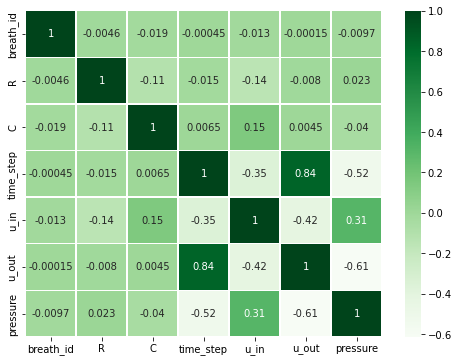

In [19]:
plt.figure(figsize = (8,6))
sns.heatmap(sample_df.corr(),annot = True , cmap = 'Greens', linewidths = 0.5);

The above graphs shows that there is negative correlation between the target column and time_step column and positive correlation between the target column and u_out column, target column and u_in column.

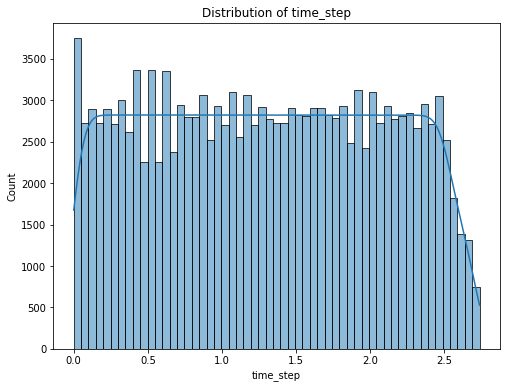

In [20]:
plt.figure(figsize = (8,6))
plt.title('Distribution of time_step')
sns.histplot(x = 'time_step',data = sample_df ,kde = True);

The above graph shows that the time_step column is uniformly distributed.

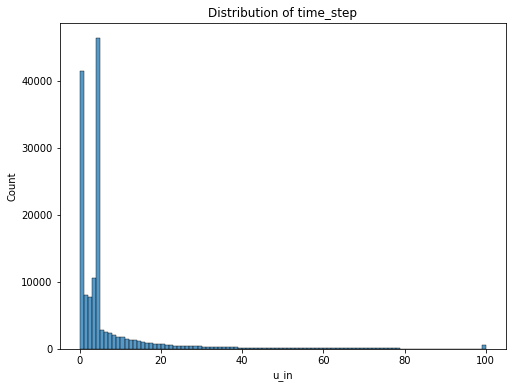

In [21]:
plt.figure(figsize = (8,6))
plt.title('Distribution of time_step')
sns.histplot(x = 'u_in',data = sample_df ,bins = 100);

The u_in attribute is right skewed. About 70% of the data lies below 7.

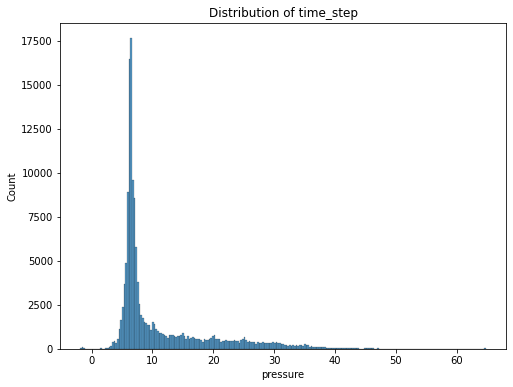

In [22]:
plt.figure(figsize = (8,6))
plt.title('Distribution of time_step')
sns.histplot(x = 'pressure',data = sample_df );

The graph shows that the target column is skewed.Most of the values lies in the ranget
 between 0 to 10.

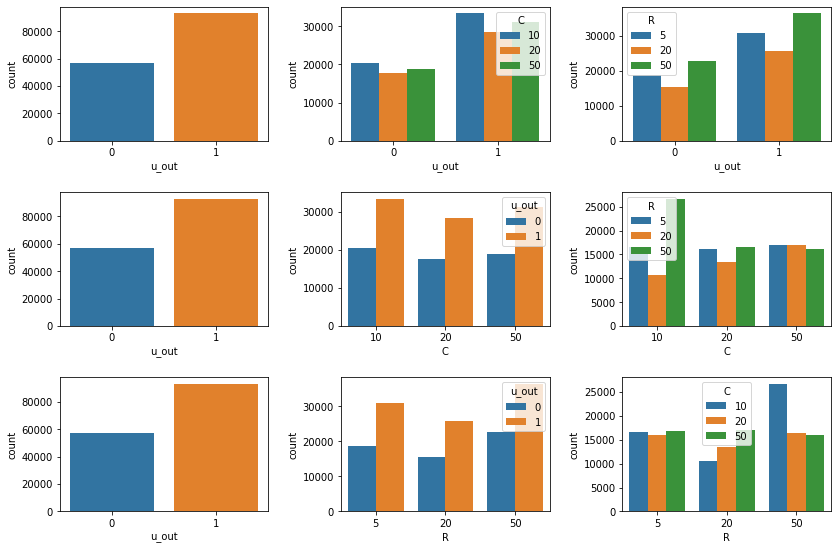

In [23]:
fig , axes = plt.subplots( 3, 3 , figsize = (12,8))

sns.countplot(x = 'u_out', data = sample_df ,ax = axes[0,0]);
sns.countplot(x = 'u_out', data = sample_df , hue = 'C',ax = axes[0,1]);
sns.countplot(x = 'u_out', data = sample_df , hue = 'R',ax = axes[0,2]);

sns.countplot(x = 'u_out', data = sample_df ,ax = axes[1,0]);
sns.countplot(x = 'C', data = sample_df , hue = 'u_out',ax = axes[1,1]);
sns.countplot(x = 'C', data = sample_df , hue = 'R',ax = axes[1,2]);

sns.countplot(x = 'u_out', data = sample_df ,ax = axes[2,0]);
sns.countplot(x = 'R', data = sample_df , hue = 'u_out',ax = axes[2,1]);
sns.countplot(x = 'R', data = sample_df , hue = 'C',ax = axes[2,2]);

plt.tight_layout(pad = 2)


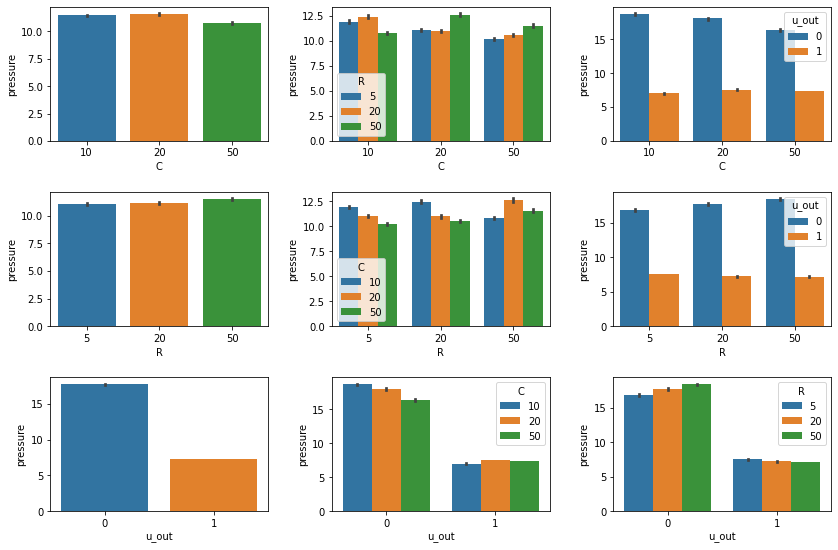

In [24]:
fig , axes = plt.subplots(3,3 , figsize = (12,8))

sns.barplot(x = 'C', y = 'pressure' , data = sample_df , ax = axes[0,0]);
sns.barplot(x = 'C', y = 'pressure' , data = sample_df , hue = 'R',ax = axes[0,1]);
sns.barplot(x = 'C', y = 'pressure' , data = sample_df , hue = 'u_out', ax = axes[0,2]);

sns.barplot(x = 'R', y = 'pressure' , data = sample_df , ax = axes[1,0]);
sns.barplot(x = 'R', y = 'pressure' , data = sample_df , hue = 'C', ax = axes[1,1]);
sns.barplot(x = 'R', y = 'pressure' , data = sample_df , hue = 'u_out', ax = axes[1,2]);

sns.barplot(x = 'u_out', y = 'pressure' , data = sample_df , ax = axes[2,0]);
sns.barplot(x = 'u_out', y = 'pressure' , data = sample_df , hue = 'C', ax = axes[2,1]);
sns.barplot(x = 'u_out', y = 'pressure' , data = sample_df , hue = 'R', ax = axes[2,2]);

plt.tight_layout(pad = 2)

From the graph we can say that C and R are uniformly distributed. The feature u_out is right skewd..

### Removing outliers

In statistics, an outlier is a data point that differs significantly from other observations. An outlier may be due to variability in the measurement or it may indicate experimental error; the latter are sometimes excluded from the data set. An outlier can cause serious problems in statistical analyses.

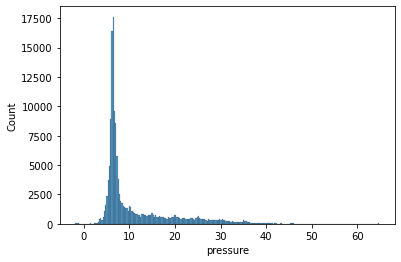

In [25]:
sns.histplot(x = 'pressure', data = sample_df);

It seems to be there are less number of records having pressure greater than 45 and lesser than 1. We can consider those records as outliers.

In [26]:
sample_df = sample_df[(sample_df['pressure']>1) & (sample_df['pressure']<45)]
sample_df[sample_df['u_in']>70].shape[0]

1860

There are less number of records having 'u_in' greater than 70. So we can consider those as outliers and we can remove that.

In [27]:
sample_df = sample_df[sample_df['u_in'] < 70]

## Model training and Prediction

### Spliting the data for model training

In [28]:
import sklearn

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
input_cols = sample_df.columns.to_list()[:-1]
target_var = 'pressure'

In [31]:
train_df , val_df , train_target , val_target = train_test_split(sample_df[input_cols],sample_df[target_var],random_state = 42 , test_size = 0.3)

In [32]:
print(f'Size of the train input data is {train_df.shape}')
print(f'Size of the train target data is {train_target.shape}')
print(f'Size of the test input data is {val_df.shape}')
print(f'Size of the test target data is {val_target.shape}')

Size of the train input data is (103253, 6)
Size of the train target data is (103253,)
Size of the test input data is (44252, 6)
Size of the test target data is (44252,)


### LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
model1 = LinearRegression()

In [36]:
model1.fit(train_df,train_target)

LinearRegression()

In [37]:
pred = model1.predict(train_df)
train_rmse = mean_squared_error(pred,train_target,squared = False)
print(f'RMSE for the training set is {round(train_rmse,3)} ')

RMSE for the training set is 6.132 


In [38]:
val_pred = model1.predict(val_df)
val_rmse = mean_squared_error(val_pred,val_target,squared = False)
print(f'RMSE for the validation set is {round(val_rmse,3)} ')

RMSE for the validation set is 6.151 


In [39]:
score = model1.score(train_df,train_target)
val_score = model1.score(val_df,val_target)
print(f'Training score for LinearRegression() is {round(score,3)*100}% ')
print(f'Validation score of LinearRegression() is {round(val_score,3)*100}% ')

Training score for LinearRegression() is 39.5% 
Validation score of LinearRegression() is 39.4% 


From the above information we can conclude that LinearRegression is not a good model for this dataset.So we will try out different algorithms in the later stages.

### DecisionTreeRegressor


In [40]:
from sklearn.tree import DecisionTreeRegressor

In [41]:
model2 = DecisionTreeRegressor(random_state=42)

Training the model.

In [42]:
model2.fit(train_df,train_target)

DecisionTreeRegressor(random_state=42)

In [43]:
pred = model2.predict(train_df)
train_rmse = mean_squared_error(pred,train_target,squared = False)
print(f'RMSE for the training set is {round(train_rmse,3)} ')

RMSE for the training set is 0.0 


In [44]:
val_rmse = mean_squared_error(model2.predict(val_df),val_target,squared = False)
print(f'RMSE for the training set is {round(val_rmse,3)} ')

RMSE for the training set is 4.005 


In [45]:
score = model2.score(train_df,train_target)
val_score = model2.score(val_df,val_target)
print(f'Training score for DecisionTreeRegressor is {round(score,3)*100}% ')
print(f'Validation score of DecisionTreeRegressor is {round(val_score,3)*100}% ')

Training score for DecisionTreeRegressor is 100.0% 
Validation score of DecisionTreeRegressor is 74.3% 


The above information says that DecisionTreeRegressor is far more better than LinearRegression

In [46]:
from sklearn.tree import plot_tree,export_text

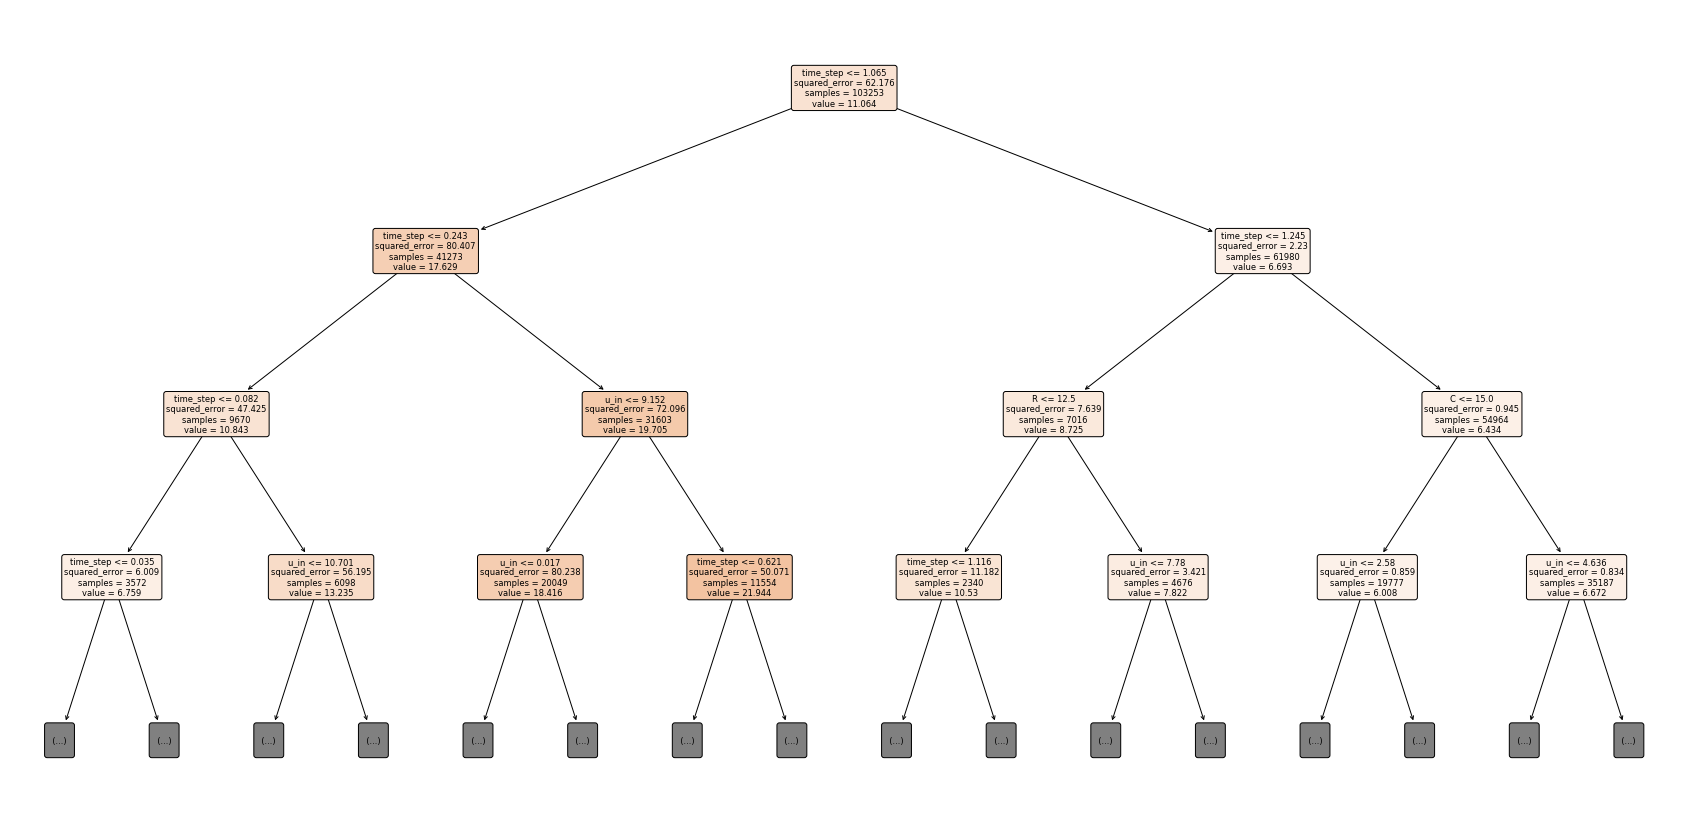

In [47]:
plt.figure(figsize = (30,15))
plot_tree(model2,feature_names = train_df.columns.to_list(),max_depth = 3 ,filled = True,rounded = True);

In [48]:
feature_importance = model2.feature_importances_
feature_importance_df = pd.DataFrame({
                                     'Feature' : train_df.columns,
                                     'Importance' : feature_importance
                                     }).sort_values('Importance',ascending = False)

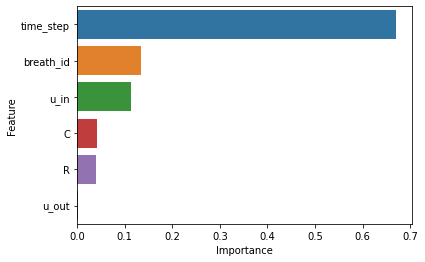

In [49]:
sns.barplot(x = 'Importance', y = 'Feature' , data = feature_importance_df);

The graph shows that time_step is the most importance feature among all of the features for predicting the ventilator pressure.

#### Parameter Tuning

In [50]:
def decisionTreeRegressor(X,y,**params):
  model = DecisionTreeRegressor(random_state = 42,**params).fit(X,y)
  train_error = 1 - model.score(X,y)
  val_error = 1 - model.score(val_df,val_target)
  return { 'train_error' :train_error , 'val_error' : val_error }

In [51]:
max_depth_error_df = pd.DataFrame([decisionTreeRegressor(train_df,train_target,max_depth = i) for i in range(1,40)])
max_depth_error_df['max_depth'] = [i for i in range(1,40)]

In [52]:
def error_plot(X,Y1,Y2):
  plt.figure(figsize=(8,6))
  plt.plot(X,Y1)
  plt.plot(X,Y2)
  plt.title('Training vs Validation error')
  plt.legend(['Training error','Validation error'])
  plt.show;


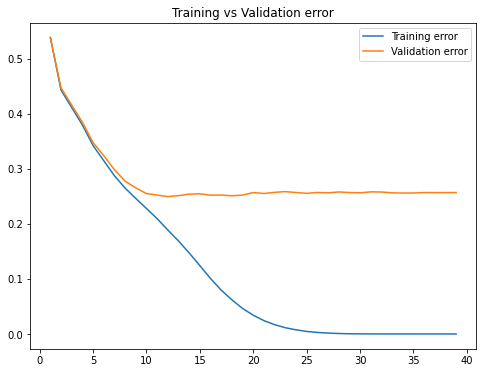

In [53]:
error_plot(max_depth_error_df.max_depth,max_depth_error_df.train_error,max_depth_error_df.val_error)

Best value for parameter max_depth is 11.

In [54]:
min_samples_split_df = pd.DataFrame([decisionTreeRegressor(train_df,train_target,min_samples_split = i) for i in range(2,40,2)])
min_samples_split_df['Min_samples_split'] = [ i for i in range(2,40,2)]

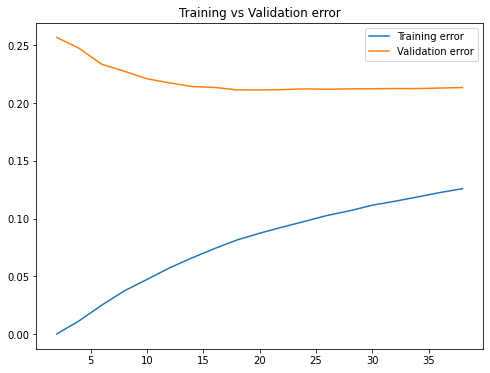

In [55]:
error_plot(min_samples_split_df.Min_samples_split,min_samples_split_df.train_error,min_samples_split_df.val_error)

Best value for the parameter for min_samples_split is 20.

In [56]:
good_model3 = DecisionTreeRegressor(random_state = 42, min_samples_split=20,max_depth=11)

In [57]:
good_model3.fit(train_df,train_target)

DecisionTreeRegressor(max_depth=11, min_samples_split=20, random_state=42)

In [58]:
score = good_model3.score(train_df,train_target)
val_score = good_model3.score(val_df,val_target)
print(f'Training score for DecisionTreeRegressor is {round(score,3)*100}% ')
print(f'Validation score of DecisionTreeRegressor is {round(val_score,3)*100}% ')

Training score for DecisionTreeRegressor is 78.7% 
Validation score of DecisionTreeRegressor is 74.9% 


### RandomForestRegressor

In [59]:
from sklearn.ensemble import RandomForestRegressor

In [60]:
model3 = RandomForestRegressor(n_jobs = -1, random_state = 42 )

In [61]:
model3.fit(train_df,train_target)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [62]:
pred = model3.predict(train_df)
train_rmse = mean_squared_error(pred,train_target,squared = False)
print(f'RMSE for the training set is {round(train_rmse,3)} ')

RMSE for the training set is 1.138 


In [63]:
val_rmse = mean_squared_error(model3.predict(val_df),val_target,squared = False)
print(f'RMSE for the training set is {round(val_rmse,3)} ')

RMSE for the training set is 3.061 


In [64]:
score = model3.score(train_df,train_target)
val_score = model3.score(val_df,val_target)
print(f'Training score for DecisionTreeRegressor is {round(score,4)*100}% ')
print(f'Validation score of DecisionTreeRegressor is {round(val_score,3)*100}% ')

Training score for DecisionTreeRegressor is 97.92% 
Validation score of DecisionTreeRegressor is 85.0% 


In [65]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_df, train_target)
    return model.score(train_df,train_target) , model.score(val_df,val_target)

RandomForestRegressor seems to the best model among the previous models.

In [66]:
features = model3.feature_importances_
features_df = pd.DataFrame({'Features':train_df.columns,
                             'Importance':features}).sort_values('Importance',ascending = False)

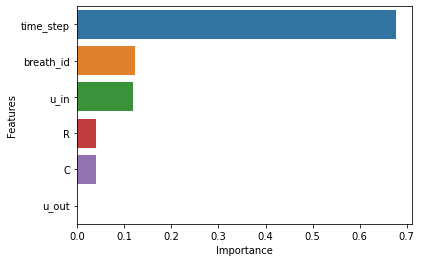

In [67]:
sns.barplot(x = 'Importance', y = 'Features', data = features_df);

time_step feature have greater on the RandomForestRegressor.

#### Parameter tuning

In [68]:
def test_params(**params):
    model = RandomForestRegressor(random_state=42, n_jobs=-1, **params).fit(train_df, train_target)
    train_rmse = mean_squared_error(model.predict(train_df), train_target, squared=False)
    val_rmse = mean_squared_error(model.predict(val_df), val_target, squared=False)
    return train_rmse, val_rmse

In [69]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [70]:
test_params(n_estimators = 150)

(1.1279415720209083, 3.052003267390944)

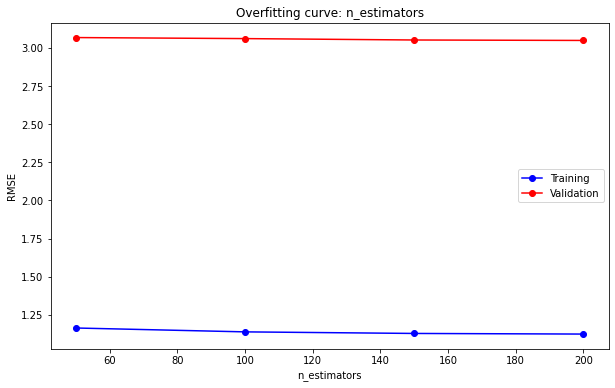

In [71]:
test_param_and_plot('n_estimators' , [50,100,150,200])

n_estimators has no effect on this model. The change in the model's performance is significance.

Default parameters of RandomForestRegression predicts ventilator very well.

### XGBRegressor

In [72]:
import xgboost

In [73]:
from xgboost import XGBRegressor

In [74]:
model4 = XGBRegressor(random_state = 42, n_jobs = -1)

In [75]:
model4.fit(train_df,train_target)

[07:14:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_jobs=-1, random_state=42)

In [76]:
pred = model4.predict(train_df)
train_rmse = mean_squared_error(pred,train_target,squared = False)
print(f'RMSE for the training set is {round(train_rmse,3)} ')

RMSE for the training set is 4.117 


In [77]:
val_rmse = mean_squared_error(model4.predict(val_df),val_target,squared = False)
print(f'RMSE for the training set is {round(val_rmse,3)} ')

RMSE for the training set is 4.189 


In [78]:
score = model4.score(train_df,train_target)
val_score = model4.score(val_df,val_target)
print(f'Training score for DecisionTreeRegressor is {round(score,2)*100}% ')
print(f'Validation score of DecisionTreeRegressor is {round(val_score,2)*100}% ')

Training score for DecisionTreeRegressor is 73.0% 
Validation score of DecisionTreeRegressor is 72.0% 


#### Parameter tuning

In [79]:
def test_params_(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_df, train_target)
    train_rmse = mean_squared_error(model.predict(train_df), train_target, squared=False)
    val_rmse = mean_squared_error(model.predict(val_df), val_target, squared=False)
    return train_rmse, val_rmse

In [80]:
def test_param_and_plot_(param_name, param_values):
    train_errors, val_errors = [], [] 
    for value in param_values:
        params = {param_name: value}
        train_rmse, val_rmse = test_params_(**params)
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
    plt.figure(figsize=(10,6))
    plt.title('Overfitting curve: ' + param_name)
    plt.plot(param_values, train_errors, 'b-o')
    plt.plot(param_values, val_errors, 'r-o')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

In [81]:
test_params_(n_estimators = 1500)

[07:14:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(3.320890823463479, 3.5177554272767324)

In [82]:
def test_params_(**params):
    model = XGBRegressor(random_state=42, n_jobs=-1, **params).fit(train_df, train_target)
    train_rmse = mean_squared_error(model.predict(train_df), train_target, squared=False)
    val_rmse = mean_squared_error(model.predict(val_df), val_target, squared=False)
    return {'Train_RMSE' : train_rmse , 'Val_RMSE' : val_rmse }

In [83]:
n_estimators_df = pd.DataFrame([test_params_(n_estimators = i) for i in range(100,1000,100)])
n_estimators_df['n_estimators'] = [ i for i in range(100,1000,100)]

[07:15:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:15:51] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:06] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:16:46] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:17:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:17:44] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

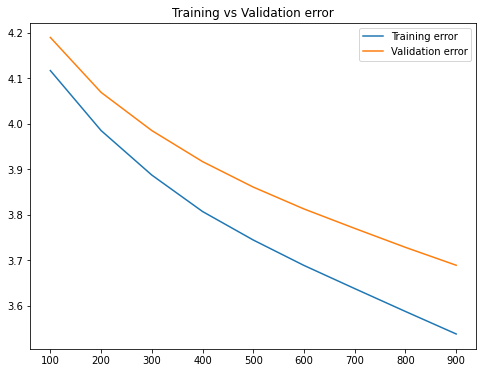

In [84]:
error_plot(n_estimators_df.n_estimators,n_estimators_df.Train_RMSE,n_estimators_df.Val_RMSE)

n_estimators have big impact on the RMSE values.It seems like if we increase the n_estimators , it will minimize the RMSE values.Best value for n_estimators is 1500.

[07:19:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


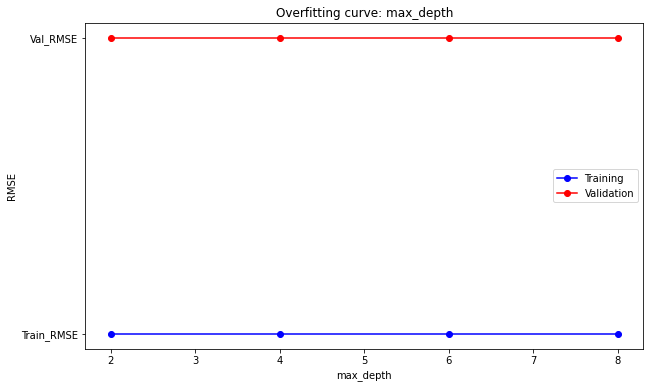

In [85]:
test_param_and_plot_('max_depth' , [ i for i in range(2,10,2)])

max_depth doesn't have a significance change in the model accuracy.

[07:19:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:45] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:50] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:19:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[07:20:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

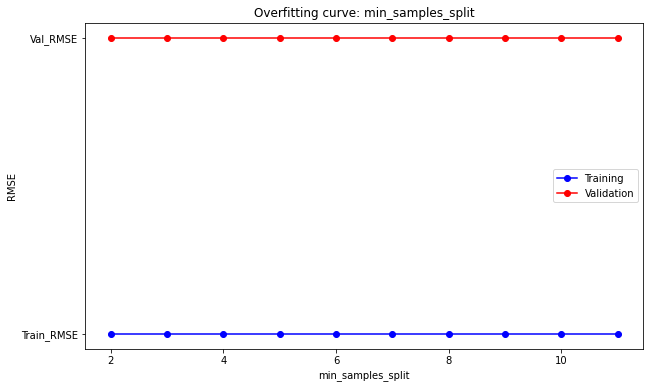

In [86]:
test_param_and_plot_('min_samples_split' , [ i for i in range(2,12,1)]);

Only n_estimators have big impact on the model accuracy.

In [87]:
good_model4 = XGBRegressor(n_jobs = -1 , n_estimators = 1500,random_state = 42)

In [88]:
good_model4.fit(train_df,train_target)

[07:20:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1500, n_jobs=-1, random_state=42)

In [89]:
pred = good_model4.predict(train_df)
train_rmse = mean_squared_error(pred,train_target,squared = False)
print(f'RMSE for the training set is {round(train_rmse,3)} ')

RMSE for the training set is 3.321 


In [90]:
val_rmse = mean_squared_error(good_model4.predict(val_df),val_target,squared = False)
print(f'RMSE for the training set is {round(val_rmse,3)} ')

RMSE for the training set is 3.518 


In [91]:
score = good_model4.score(train_df,train_target)
val_score = model4.score(val_df,val_target)
print(f'Training score for DecisionTreeRegressor is {round(score,2)*100}% ')
print(f'Validation score of DecisionTreeRegressor is {round(val_score,2)*100}% ')

Training score for DecisionTreeRegressor is 82.0% 
Validation score of DecisionTreeRegressor is 72.0% 


#### Prediction on the test set

We are going to predict the test set using RandomForestRegressor. Because so far it seems to be the best model for this dataset.

In [92]:
test_df = pd.read_csv('./ventilator-pressure-prediction/test.csv')

In [96]:
test_df.drop('id',axis = 1, inplace = True)

In [107]:
sample_submission = pd.read_csv('./ventilator-pressure-prediction/sample_submission.csv')

In [109]:
def predict_and_submit(model,fname):
  test_pred = model.predict(test_df)
  sub_df = pd.read_csv('./ventilator-pressure-prediction/sample_submission.csv')
  sub_df['pressure'] = test_pred
  sub_df.to_csv(fname,index = None)
  return sub_df

In [110]:
predict_and_submit(model3,'RandomForestRegressor.csv')

,id,pressure
0,1,6.141197
1,2,5.905685
2,3,7.429132
3,4,7.701202
4,5,10.064057
...,...,...
4023995,4023996,6.162288
4023996,4023997,6.172130
4023997,4023998,6.264929
4023998,4023999,6.180566


### Prediction on the new input

In [112]:
new_input = pd.DataFrame({'breath_id' : 3058 , 
                          'R' : 50 ,
                          'C' : 20 , 
                          'time_step' :  2.281302 , 
                          'u_in' : 11.857321 , 
                          'u_out' : 1 
    
                         } , index = [0])

In [113]:
model3.predict(new_input)

array([6.76548003])

The model predict 6.765 as the pressure of the ventilator.

### Saving and loading the train_model

In [116]:
import joblib

In [117]:
best_model = { 
                          'model' : model3,
                          'input_cols' : input_cols,
                          'target_col' : target_var
                         }
                          

In [118]:
joblib.dump(best_model , 'RandomForestRegressor.joblib')

['RandomForestRegressor.joblib']

In [121]:
RandomForestRegressor_ = joblib.load('RandomForestRegressor.joblib')

In [124]:
RandomForestRegressor_['model'].score(val_df,val_target)

0.8499407842170842

### Summary and References

The following model are trained to predict the pressure of the ventilator.
- 1. LinearRegresson() 2. DecisionTreeRegressor() 3. RandomForestRegressor() 4. XGBRegressor()
- The dataset used in this project can be downloaded from the following link  https://www.kaggle.com/competitions/ventilator-pressure-prediction/data?select=train.csv
